# DS-E07 Algorithm Design Techniques
---

For the each of the following questions, you are encouraged to solve them using the following techniques where possible:  
- Brute Force Techniques
- Divide-and-Conquer
- Dynamic Programming
    - Memoization
    - Tabulation
- Greedy Algorithms

For each technique used, understand the pros and cons of each method. Understanding the various techniques is very useful especially for acing coding interviews.

---

## Question 1

Given weights and values of *n* items, put these items in a knapsack of capacity *W* to get the maximum total value in the knapsack.

In other words, given two integer arrays $wt[0, \cdots, n-1]$ and $val[0, \cdots, n-1]$ which represent weights and values associated with the $n$ items respectively.

Also given an integer $W$ which represents knapsack capacity, find out the maximum value subset of $val[]$ such that sum of the weights of this subset is smaller than or equal to $W$. Note: You can either pick the complete item or not pick it at all.

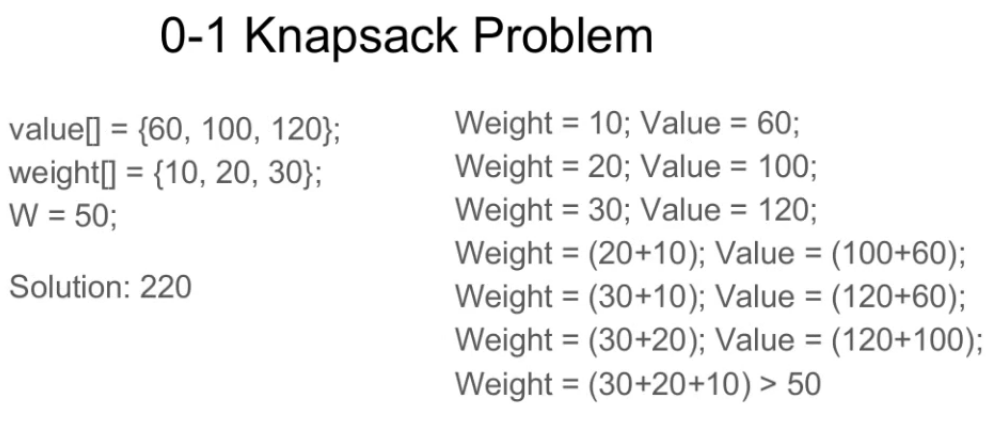

In [29]:
values = [60,100,120]
weights = [10,20,30]

# Explanation for (counter & 1 << j) Condition

The range function returns a list of numbers from zero to the given number minus one. It also has two- and three-argument forms (see the doc for more info):

range(n) == [0, 1, 2, ..., n - 1]
<< is the left-shift operator, and has the effect of multiplying the left hand side by two to the power of the right hand side:

```python
x << n == x * 2**n
```
Thus the above range function (range(1, 1 << x)) returns [1, 2, 3, ..., 2**x - 1].

In the seconds usage of <<, the left-shift is being used as a bit-mask. It moves the 1-bit into the j-th bit, and performs a bit-wise and with i, so the result will be non-zero (and pass the if test) if and only if the j-th bit of i is set. For example:

``` python
j = 4
1 << j = 0b1000 (binary notation)

i = 41 = 0b101001
i & (1 << j) = 0b101001
             & 0b001000
             = 0b001000 (non-zero, the if-test passes)

i = 38 = 0b100110
i & (1 << j) = 0b100110
             & 0b001000
             = 0b000000 (zero, the if-test fails)
        ```
        
In short, x & (1 << y) is non-zero iff the y-th bit of x is set.

In [14]:
'''Brute Force'''
size = 2**len(values)
maxWeight = 50
maxValue = -float('inf')

j = 0
while j < size:
    subset = set()
    weight, value = 0, 0
    for k in range(len(values)):
        if j & 1 << k:
                subset.add(values[k])
                value += values[k]
                weight += weights[k]
                print(subset, weight, value)
    if weight <= maxWeight and value > maxValue:
        print("within if statement: ", weight, value)
        maxValue = value
        bestsubset = subset
    j += 1

print(f"The best subset is {bestsubset} and its value is {maxValue}.")

within if statement:  0 0
{60} 10 60
within if statement:  10 60
{100} 20 100
within if statement:  20 100
{60} 10 60
{100, 60} 30 160
within if statement:  30 160
{120} 30 120
{60} 10 60
{120, 60} 40 180
within if statement:  40 180
{100} 20 100
{120, 100} 50 220
within if statement:  50 220
{60} 10 60
{100, 60} 30 160
{100, 60, 120} 60 280
The best subset is {120, 100} and its value is 220.


# Knapsack Solution from the Internet

http://www.es.ele.tue.nl/education/5MC10/Solutions/knapsack.pdf

In [34]:
knapsackDict = {
    'A': {'value': 60, 'weight': 10},
    'B': {'value': 100, 'weight': 20},
    'C': {'value': 120, 'weight': 30},
}

In [30]:
'''Recursion (without Memoization)'''
# A naive recursive implementation of 0-1 Knapsack Problem 
  
# Returns the maximum value that can be put in a knapsack of capacity W

# FROM: https://www.geeksforgeeks.org/0-1-knapsack-problem-dp-10/

def knapSack(W, wt, val, n): 
  
    # Base Case 
    if n == 0 or W == 0: 
        return 0
  
    # If weight of the nth item is 
    # more than Knapsack of capacity W, 
    # then this item cannot be included 
    # in the optimal solution 
    if (wt[n-1] > W): 
        return knapSack(W, wt, val, n-1) 
  
    # return the maximum of two cases: 
    # (1) nth item included 
    # (2) not included 
    else: 
        return max( 
            val[n-1] + knapSack( 
                W-wt[n-1], wt, val, n-1), 
            knapSack(W, wt, val, n-1)) 

In [ ]:
'''Dynamic Programming (Memoization)'''


In [ ]:
'''Dynamic Programming (Tabulation)'''


---

## Question 2

Given an integer list `nums`, find a <u>contiguous</u> sub list (containing at least one number) which has the largest sum and return the largest sum.

**Example 1:**  
Input: nums = [-2,1,-3,4,-1,2,1,-5,4]  
Output: 6  
Explanation: [4,-1,2,1] has the largest sum = 6.

**Example 2:**  
Input: nums = [1]  
Output: 1

**Example 3:**  
Input: nums = [-1]  
Output: -1  

**Example 4:**   
Input: nums = [-2147483647]  
Output: -2147483647

**Example 4:**   
Input: nums = [2,-1,2]  
Output: 3

---

In [26]:
nums = [-2,1,-3,4,-1,2,1,-5,4]

In [28]:
'''Brute Force'''
size = 2**len(nums)
maxSum = -float('inf')

for k in range(len(nums)):
    sumSublist = 0
    for j in range(len(nums)):
        sumSublist = sum(nums[k:j])
        if sumSublist > maxSum:
            maxSum = sumSublist
maxSum

6

In [ ]:
'''Divide-and-Conquer'''


In [ ]:
'''Greedy'''


*Additional*  
You are encouraged to read up about *Kadane's Algorithm* and how it can be used to solve this problem. 

In [24]:
'''Kadane's Algorithm'''

def KadaneAlgo(nums):
    maxSoFar = -float('inf')
    maxNow = 0
    startIdx = 0
    endIdx = 0

    for idx, num in enumerate(nums):
        maxNow = maxNow + num
        # print("maxNow",maxNow)
        # print("num",num)
        if maxNow > maxSoFar:
            maxSoFar = maxNow
            endIdx = idx

        if maxNow < 0:
            maxNow = 0
            startIdx = idx + 1 # Because you have to reset the start index to the next index.
            endIdx = idx
    return maxSoFar, [startIdx, endIdx]

KadaneAlgo(nums)

maxNow -2
num -2
maxNow 1
num 1
maxNow -2
num -3
maxNow 4
num 4
maxNow 3
num -1
maxNow 5
num 2
maxNow 6
num 1
maxNow 1
num -5
maxNow 5
num 4


(6, [3, 6])

---

For more questions and solutions, you can visit the following links:
- [https://www.geeksforgeeks.org/dynamic-programming/](https://www.geeksforgeeks.org/dynamic-programming/)

- [https://leetcode.com/](https://leetcode.com/)

- [https://www.codewars.com/](https://www.codewars.com/)